In [1]:
#loading in the test data
import pandas as pd

df = pd.read_csv('urls_with_transcripts.csv') # csv for video text df
df.head()


,Title,Date,Duration,URL,Source,In_April,text
0,Explosions in Iran as Israel vows retaliation ...,2024-04-19,0:00:57,https://www.youtube.com/watch?v=bQRYjWIDCkM,CNN,True,there's Breaking News Tonight reports that Isr...
1,"Israel carries out strike against Iran, US off...",2024-04-19,0:00:42,https://www.youtube.com/watch?v=CwJdNZ72M5U,CNN,True,I purchase moments ago from Us official confir...
2,House passes foreign aid for Ukraine and Israel,2024-04-20,0:00:58,https://www.youtube.com/watch?v=fee7eSNW58c,CNN,True,I miss both the Asia 311 and the Nazar 112 the...
3,Explosions over skies of Israel as barrage of ...,2024-04-14,0:07:44,https://www.youtube.com/watch?v=g1vAkZx2xDg,CNN,True,you were following major breaking news over th...
4,Dramatic video shows outgoing Hezbollah rocket...,2024-04-14,0:07:46,https://www.youtube.com/watch?v=lLBzubEayvo,CNN,True,is Israel scrambled big time to intercept an u...


In [17]:
import string
from textblob import TextBlob

def preprocess_text_textblob(text):
    """
    Preprocess text for sentiment analysis with TextBlob
    
    Tokenization is handled internally and not done here;
    lemmatization is also not done because the textblob model uses raw text tokens for training
    
    """
    # Lowercase for text uniformity
    text = text.lower()
    
    # Removing punctuation that does not contribute to sentiment
    # Keeping exclamation marks because they can intensify sentiment (eg., "great!" vs "great")
    punct_to_remove = string.punctuation.replace('!', '')  # excluding '!' from removal list
    translator = str.maketrans('', '', punct_to_remove)
    text = text.translate(translator)
    return text

def get_sentiment(text):
    """Calculate sentiment polarity and subjectivity after preprocessing text for TextBlob."""
    processed_text = preprocess_text_textblob(text)
    blob = TextBlob(processed_text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Filter the DataFrame to remove any rows where 'text' is not a string
df = df[df['text'].apply(lambda x: isinstance(x, str))]

# Apply sentiment analysis
df[['polarity', 'subjectivity']] = df['text'].apply(lambda x: pd.Series(get_sentiment(x)))

print(df)


                                                Title       Date Duration  \
37  Israel accused of deadly strike on Iranian con... 2024-04-01  0:09:08   
6   Iran accuses Israel of killing top commander i... 2024-04-01  0:09:09   
30  US 'outraged' by Israeli strike on World Centr... 2024-04-02  0:04:26   
39  Three British workers among those killed in Ga... 2024-04-02  0:09:25   
40  Israel minister denies Gaza aid convoy air str... 2024-04-04  0:05:50   
38  Israel-Gaza: UK arms sales to Israel should en... 2024-04-04  0:07:49   
8   Ex-CIA director makes prediction about Netanya... 2024-04-04  0:08:07   
34  Israel says it will open new aid routes into G... 2024-04-05  0:06:10   
24  Gaza evacuation warnings from IDF contain many... 2024-04-05  0:03:14   
17  McDonald's to buy back Israeli restaurants aft... 2024-04-05  0:00:59   
48  Israel military fires senior officers after ai... 2024-04-05  0:12:53   
46  Israelis and Palestinians mark six months of w... 2024-04-07  0:12:28   

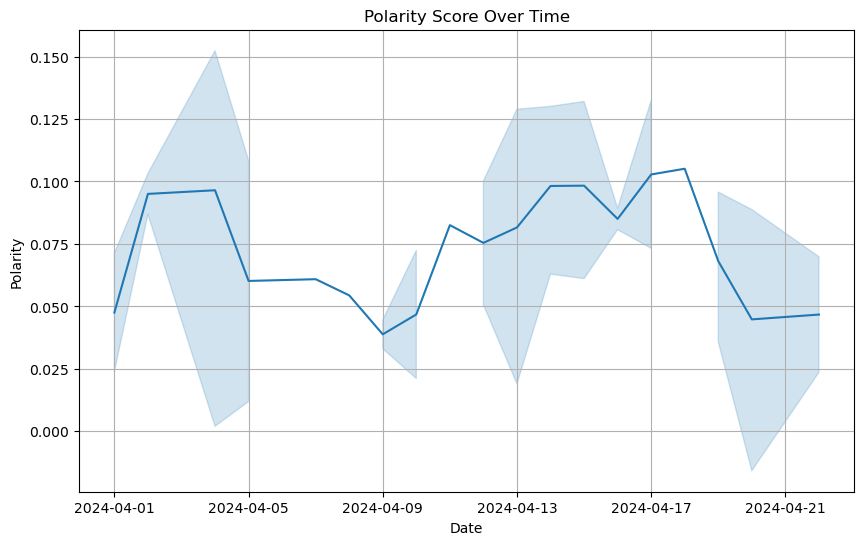

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='polarity', data=df)

plt.title('Polarity Score Over Time') 
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.grid(True) 

plt.show()



In [7]:
df.to_csv('Sentiment_Analysis_April.csv', index=False)


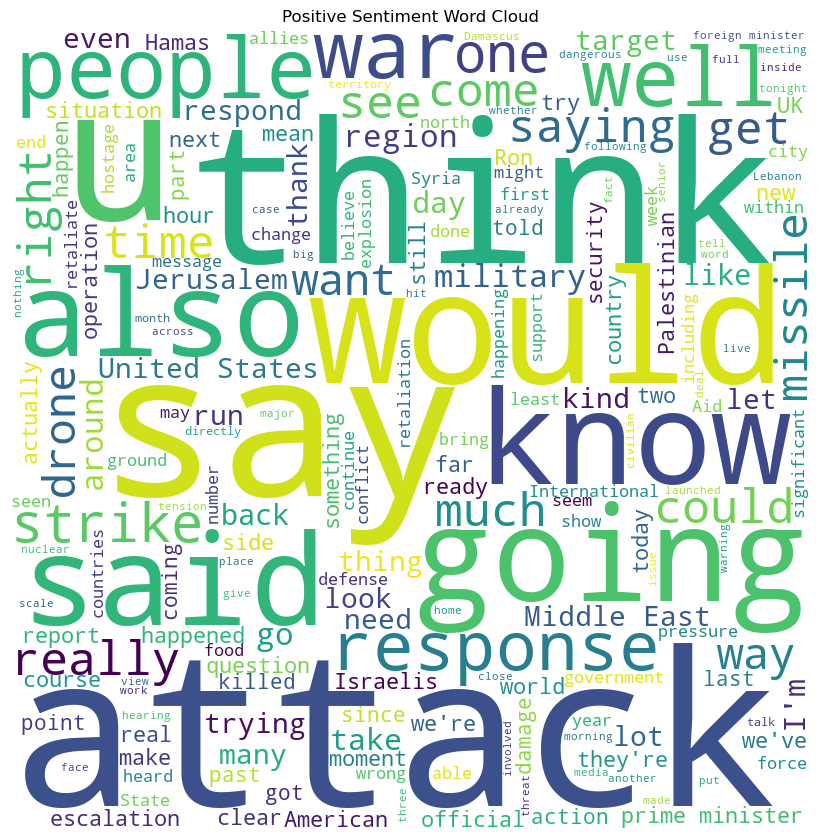

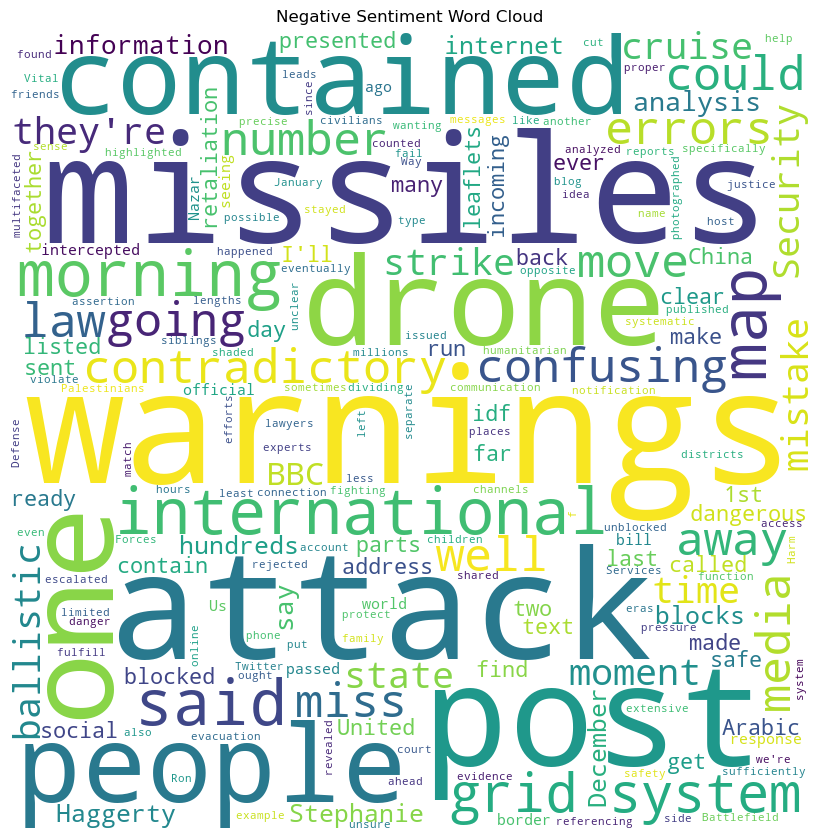

In [31]:
import nltk
#nltk.download('stopwords') # download the stop words
from nltk.corpus import stopwords
from wordcloud import WordCloud

# get the english stopwords
stop_words = set(stopwords.words('english'))
# add the words that are frequently used and not useful for our analysis
stop_words.update({'israel', 'iran', 'gaza','israeli','iranian','gazan'})

# classify text as 'positive' or 'negative' based on polarity
def classify_sentiment(text):
    polarity, _ = get_sentiment(text)
    return 'positive' if polarity > 0 else 'negative'

df['sentiment'] = df['text'].apply(classify_sentiment)

# word cloud plots
def wordcloud_plot(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.title(title)
    plt.show()
    
# separate positive and negative texts to plot wordcloud
positives = ' '.join(df[df['sentiment'] == 'positive']['text'])
negatives = ' '.join(df[df['sentiment'] == 'negative']['text'])

# apply the function
wordcloud_plot(positives, 'Positive Sentiment Word Cloud')
wordcloud_plot(negatives, 'Negative Sentiment Word Cloud')